In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from typing import List

In [3]:
house_df = pd.read_csv("complete_houses_mod.csv")
# df = house_df.loc[:, house_df.isnull().mean() < .8]
# df
house_df.columns

Index(['Unnamed: 0', 'id', 'Zip', 'Price', 'Price of square meter',
       'Living area', 'Number of rooms', 'Garden surface', 'Terrace surface',
       'Open fire', 'Surface of the land', 'Number of facades',
       'Swimming pool', 'Building Cond. values', 'Kitchen values',
       'Primary energy consumption', 'Energy efficiency'],
      dtype='object')

In [4]:
# # Remove outliers
# def remove_outliers(house_df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
#     for col in columns:
#         print('Working on column: {}'.format(col))
        
#         mean = house_df[col].mean()
#         sd = house_df[col].std()
        
#         house_df = house_df[(house_df[col] <= mean+(n_std*sd))]
        
#     return house_df

# no_outliers_df = remove_outliers(house_df, ['Number of rooms', 'Living area', 'Surface of the land', 'Terrace surface','Garden surface'], 3)

In [5]:
# Remove outliers
def remove_outliers(house_df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = house_df[col].mean()
        sd = house_df[col].std()
        
        house_df = house_df[(house_df[col] <= mean+(n_std*sd))]
        
    return house_df

no_outliers_df = remove_outliers(house_df, ['Number of rooms'], 3)

Working on column: Number of rooms


In [6]:
X = no_outliers_df

y = no_outliers_df['Price']

In [7]:
try:
    X.drop(["Unnamed: 0", "id", "Price of square meter", 'Price'], axis=1, inplace=True)
except KeyError:
    pass
X.columns

/tmp/ipykernel_3645/642547913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["Unnamed: 0", "id", "Price of square meter", 'Price'], axis=1, inplace=True)


Index(['Zip', 'Living area', 'Number of rooms', 'Garden surface',
       'Terrace surface', 'Open fire', 'Surface of the land',
       'Number of facades', 'Swimming pool', 'Building Cond. values',
       'Kitchen values', 'Primary energy consumption', 'Energy efficiency'],
      dtype='object')

In [8]:
y

0       349000
1       625000
2       149000
3       335000
4       545000
         ...  
9339    382230
9340    382484
9341    384070
9342    406000
9343    428500
Name: Price, Length: 9221, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [22]:
X_train.shape

(7376, 13)

In [23]:
X.shape

(9221, 13)

In [24]:
lm = LinearRegression() 

lm.fit(X_train,y_train)

LinearRegression()

In [25]:
# Now let’s evaluate the model by checking out its coefficients 
# and how we can interpret them.
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns = ['Coefficient'])

coeff_df

-294369.4421557434


,Coefficient
Zip,-22.205056
Living area,4.703995
Number of rooms,95782.196907
Garden surface,7.692319
Terrace surface,98.915459
Open fire,71471.747566
Surface of the land,8.827698
Number of facades,49488.147118
Swimming pool,263409.283226
Building Cond. values,47364.149303


In [14]:

# Expected kind of output : 

# Avg. Area Income : 21.528
# Avg. Area House Age : 164883.28
# Avg. Area Number of Rooms : 122368.67
# Avg. Area Number of Bedrooms : 2233.80
# Area Population : 15.15

# What does coefficient of data says:

#     Holding all other features fixed, a 1 unit increase in Avg. Area Income 
#     is associated with an increase of $21.52 .
#     Holding all other features fixed, a 1 unit increase in Avg. Area House Age 
#     is associated with an increase of $164883.28 .
#     Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms 
#     is associated with an increase of $122368.67 .
#     Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms 
#     is associated with an increase of $2233.80 .
#     Holding all other features fixed, a 1 unit increase in Area Population 
#     is associated with an increase of $15.15 .


In [26]:
predictions = lm.predict(X_test)

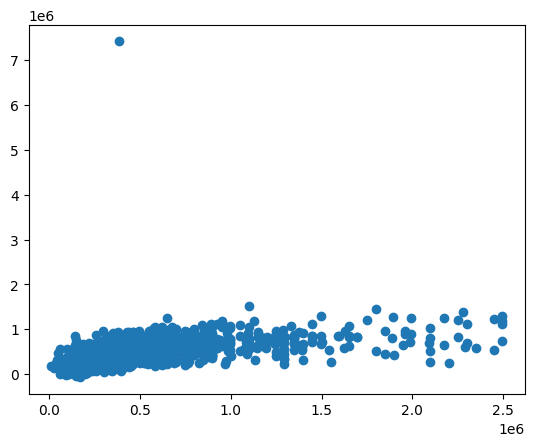

In [27]:
plt.scatter(y_test,predictions)
# Good prediction would appear as a line.

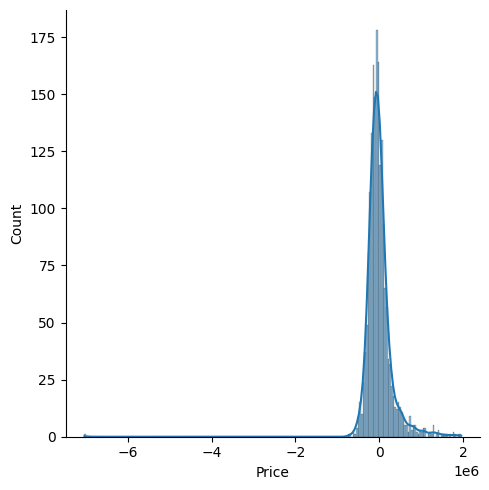

In [28]:
sns.displot((y_test-predictions), kde=True)
# If the data is displayed in a bell shape, we did well

In [32]:
print("true ", y_test.shape)
print("pred ", predictions.shape)

true  (1845,)
pred  (1845,)


In [30]:
print('MAE:', metrics.mean_absolute_error(predictions, y_test))

MAE: 192638.99040949883


In [29]:
print("r2 score ", metrics.r2_score(predictions, y_test))

r2 score  -0.5170677531032872


In [31]:
print('MSE:', metrics.mean_squared_error(predictions, y_test)) 

MSE: 111942721736.20967


In [20]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

RMSE: 612338.8734383113
